In [1]:
!wget https://raw.githubusercontent.com/WuChenDi/Audio-Processing/main/audios/mmmm.mov -O "sample_data/mmmm.mov"

--2025-06-12 07:28:16--  https://raw.githubusercontent.com/WuChenDi/Audio-Processing/main/audios/mmmm.mov
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39310 (38K) [video/quicktime]
Saving to: ‘sample_data/mmmm.mov’

sample_data/mmmm.mo 100%[===================>]  38.39K  --.-KB/s    in 0.005s  

2025-06-12 07:28:16 (6.91 MB/s) - ‘sample_data/mmmm.mov’ saved [39310/39310]



In [2]:
!ls "sample_data"

anscombe.json		      mmmm.mov		     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [3]:
!python -m pip install scipy numpy matplotlib librosa soundfile

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from scipy.signal import firwin, lfilter, freqz

# Load audio file

In [13]:
file_path = "sample_data/mmmm.mov"
y, sr = librosa.load(file_path, sr=None)
print(f"Original audio sample rate: {sr}, Total samples: {len(y)}")
print(f"Audio duration: {len(y)/sr:.2f} seconds")

# Play original audio
ipd.display(ipd.Audio(y, rate=sr))

<ipython-input-13-1573518306>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Original audio sample rate: 22050, Total samples: 91136
Audio duration: 4.13 seconds


# Create FIR low-pass filter

In [14]:
cutoff = 4000  # Hz
numtaps = 101
fir_coeff = firwin(numtaps, cutoff, fs=sr, window='hamming')
filtered_y = lfilter(fir_coeff, 1.0, y)

# Play filtered audio
ipd.display(ipd.Audio(filtered_y, rate=sr))

# Save filtered audio
sf.write('filtered.wav', filtered_y, sr)

# Visualize spectrum comparison

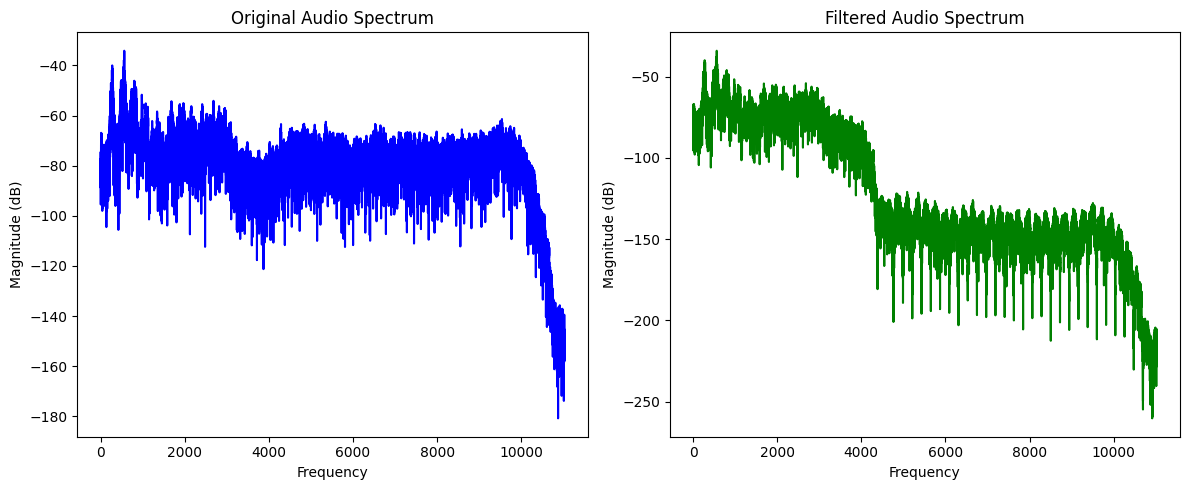

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.magnitude_spectrum(y, Fs=sr, scale='dB', color='blue')
plt.title("Original Audio Spectrum")

plt.subplot(1, 2, 2)
plt.magnitude_spectrum(filtered_y, Fs=sr, scale='dB', color='green')
plt.title("Filtered Audio Spectrum")
plt.tight_layout()
plt.show()

# Filter frequency response

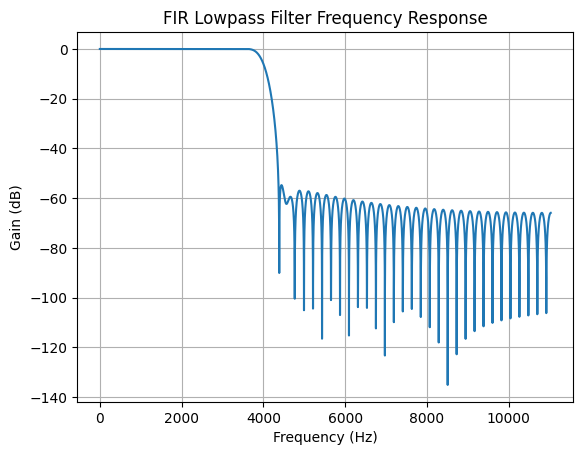

In [16]:
w, h = freqz(fir_coeff, worN=8000)
plt.plot(w * sr / (2 * np.pi), 20 * np.log10(abs(h)))
plt.title("FIR Lowpass Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.grid()
plt.show()

# Waveform and spectrogram (frequency domain analysis)

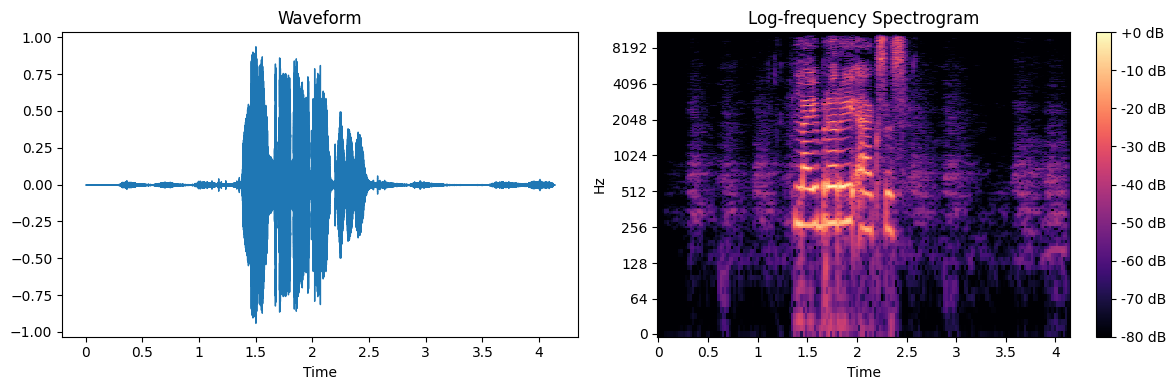

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")

plt.subplot(1, 2, 2)
D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         sr=sr, x_axis='time', y_axis='log')
plt.title("Log-frequency Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Frame-based energy analysis + simple VAD

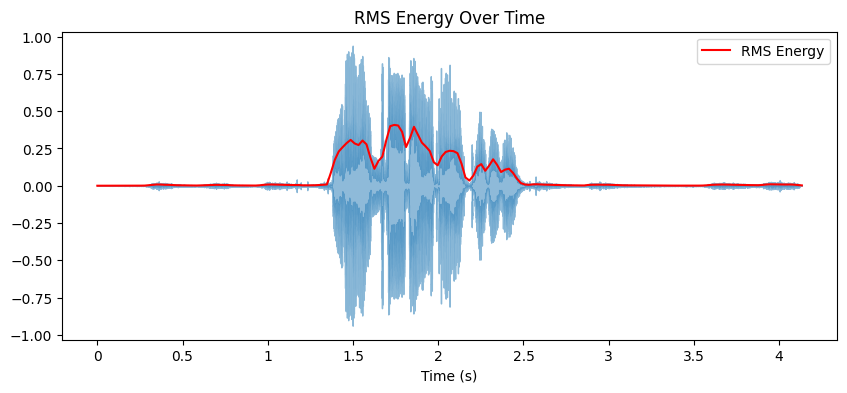

In [18]:
frame_length = 1024
hop_length = 512
rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
times = librosa.frames_to_time(np.arange(len(rms)), sr=sr, hop_length=hop_length)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(times, rms, color='r', label='RMS Energy')
plt.title("RMS Energy Over Time")
plt.xlabel("Time (s)")
plt.legend()
plt.show()


- Simple VAD implementatio

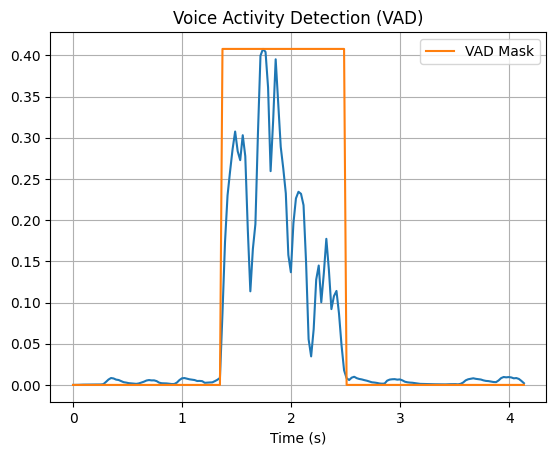

In [19]:
threshold = 0.01
speech_mask = rms > threshold
plt.plot(times, rms)
plt.plot(times, speech_mask * rms.max(), label='VAD Mask')
plt.title("Voice Activity Detection (VAD)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()
plt.show()

# Extract MFCC features

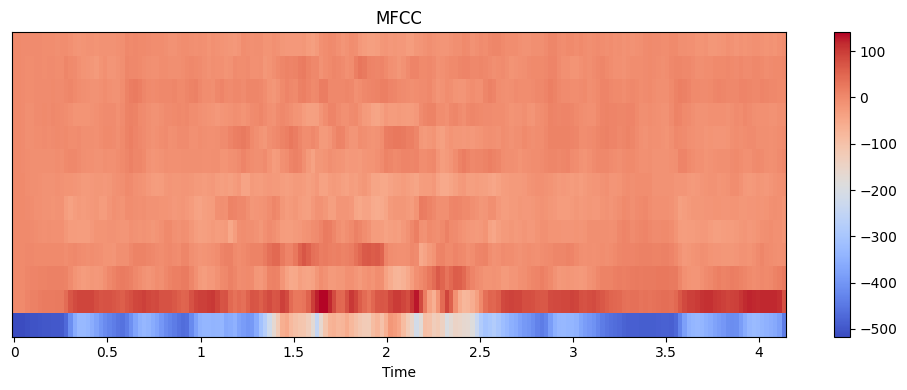

In [20]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCC")
plt.tight_layout()
plt.show()